In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Experiment 1: Hyper-parameters

In [63]:
df = pd.read_csv("results/results_hyperparams.csv")

In [64]:
df.validation_acc.min(), df.validation_acc.max(),

(0.1666666666666666, 0.6666666666666666)

In [65]:
df.validation_acc_knn.min(), df.validation_acc_knn.max(),

(0.375, 0.7083333333333334)

/tmp/ipykernel_817384/1690178621.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df[df.learning_mode != "supervised"].groupby(["encoding_dim"]).mean().reset_index()


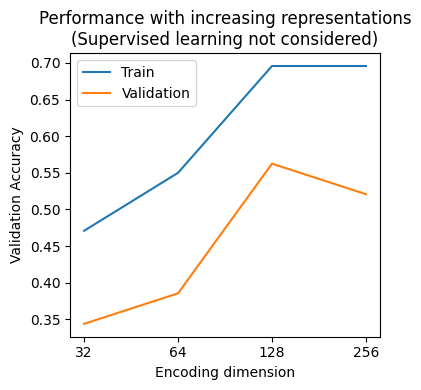

In [69]:
df_temp = df[df.learning_mode != "supervised"].groupby(["encoding_dim"]).mean().reset_index()

fig = plt.figure(figsize = (4, 4))
plt.plot(list(range(4)), df_temp.train_acc, label = "Train")
plt.plot(list(range(4)), df_temp.validation_acc, label = "Validation")
plt.xticks(list(range(4)), [32, 64, 128, 256])
plt.legend()
plt.xlabel("Encoding dimension")
plt.ylabel("Validation Accuracy")
plt.title("Performance with increasing representations\n(Supervised learning not considered)")
plt.tight_layout()

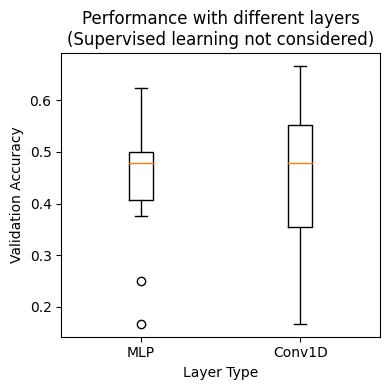

In [70]:
data_temp = np.stack([
    df[df.layer_type == "mlp"].validation_acc.values,
    df[df.layer_type == "conv1d"].validation_acc.values
])
data_temp = data_temp.T
fig = plt.figure(figsize = (4, 4))
plt.boxplot(data_temp)
plt.xticks([1, 2], labels = ["MLP", "Conv1D"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Layer Type")
plt.title("Performance with different layers\n(Supervised learning not considered)")
plt.tight_layout()
plt.show()

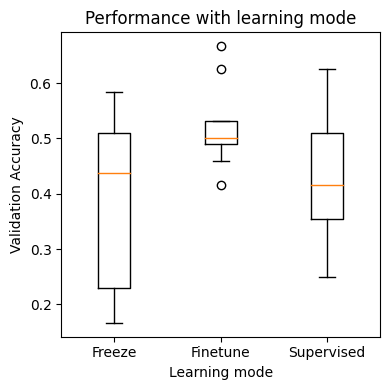

In [76]:
data_temp = np.stack([
    df[df.learning_mode == "freeze"].validation_acc.values,
    df[df.learning_mode == "finetune"].validation_acc.values,
    df[df.learning_mode == "supervised"].validation_acc.values,

])
data_temp = data_temp.T
fig = plt.figure(figsize = (4, 4))
plt.boxplot(data_temp)
plt.xticks([1, 2, 3], labels = ["Freeze", "Finetune", "Supervised"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Learning mode")
plt.title("Performance with learning mode")
plt.tight_layout()
plt.show()

## Experiment 2: Small Data

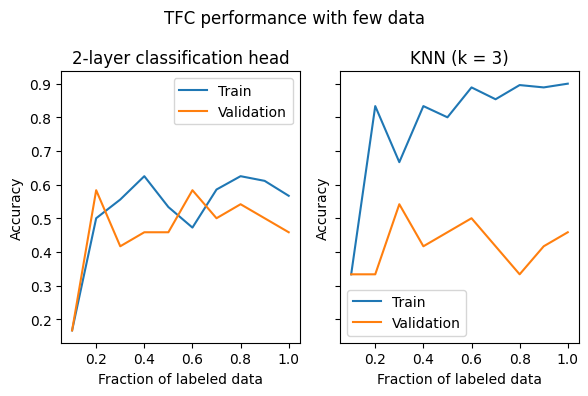

In [79]:
df = pd.read_csv("results/experiments_small_data.csv")

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 4), sharex = True, sharey = True)

axs[0].plot(df.frac, df.train_acc, label = "Train")
axs[0].plot(df.frac, df.validation_acc, label = "Validation")

axs[1].plot(df.frac, df.train_acc_knn, label = "Train")
axs[1].plot(df.frac, df.validation_acc_knn, label = "Validation")

for i in range(2):
    axs[i].set_xlabel("Fraction of labeled data")
    axs[i].set_ylabel("Accuracy")
    axs[i].legend()

axs[0].set_title("2-layer classification head")
axs[1].set_title("KNN (k = 3)")

plt.suptitle("TFC performance with few data")
plt.tight_layout()
plt.show()
